In [108]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [109]:
keys_ordered = ["ATSP/br17.atsp", "ATSP/ftv33.atsp", "ATSP/ftv38.atsp", "ATSP/ry48p.atsp", "ATSP/ft53.atsp", "ATSP/ftv55.atsp", "ATSP/ft70.atsp", "ATSP/kro124p.atsp"]
f = open("../quality_by_restarts.txt", "r")
text = f.read()

optimas = {}
optimas[keys_ordered[0]] = 39
optimas[keys_ordered[1]] = 1286
optimas[keys_ordered[2]] = 1530
optimas[keys_ordered[3]] = 14422
optimas[keys_ordered[4]] = 6905
optimas[keys_ordered[5]] = 1608
optimas[keys_ordered[6]] = 38673
optimas[keys_ordered[7]] = 36230

In [110]:
cases = {}
casename = ""
algorithm = ""
for line in text.split("\n"):
    if line[:7] == "Problem":
        casename = line[8:-1]
        cases[casename] = {}
    if len(line.split()) > 1 and line.split()[1] == "runs":
        algorithm = line.split()[0]
        cases[casename][algorithm] = {"restarts": [], "average": [], "best": [], "Qaverage": [], "Qbest": []}
    
    elements = line.split()

    if len(elements) == 3:
        cases[casename][algorithm]["restarts"].append(int(elements[0]))
        cases[casename][algorithm]["average"].append(int(elements[1]))
        cases[casename][algorithm]["best"].append(int(elements[2]))
        
        cases[casename][algorithm]["Qaverage"].append((int(elements[1]) - optimas[casename]) / optimas[casename])
        cases[casename][algorithm]["Qbest"].append((int(elements[2]) - optimas[casename]) / optimas[casename])

        

cases = {i: cases[i] for i in keys_ordered if i in cases.keys()}

In [111]:
print(cases)

{'ATSP/ftv33.atsp': {'G': {'restarts': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214

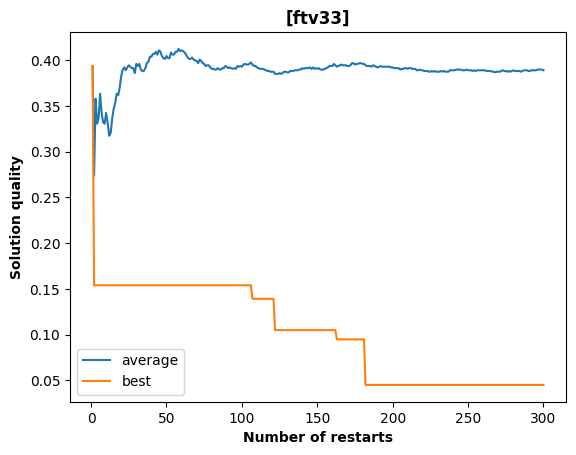

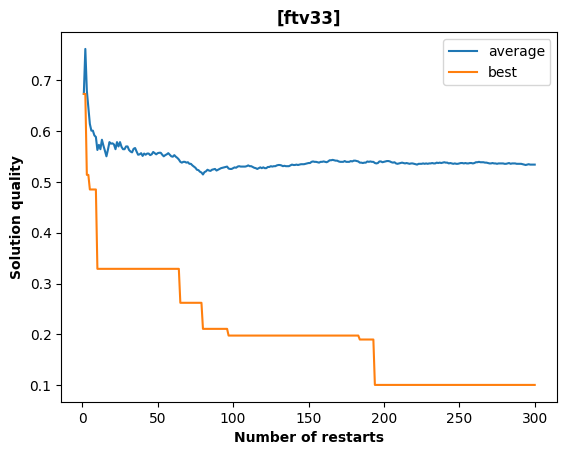

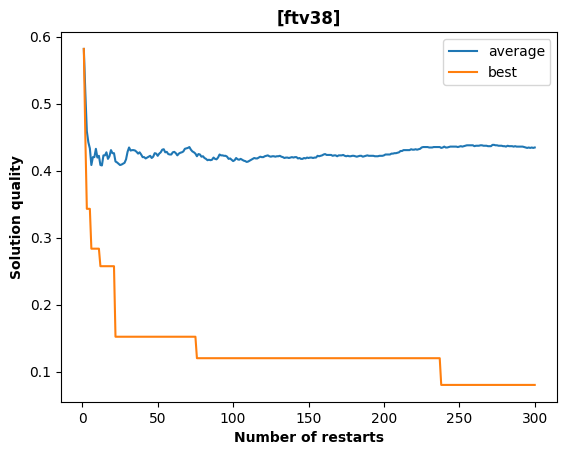

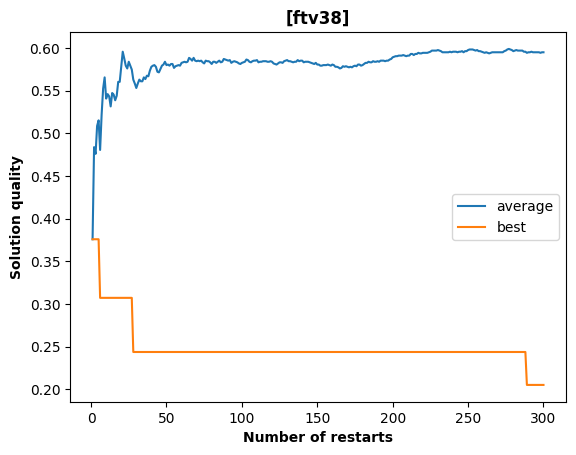

In [112]:
ticks = [i[5:-5] for i in list(cases.keys())]

for instance in range(2):
    for algorithm in ["G", "S"]:

        key = list(cases.keys())[instance]
        plt.plot(cases[key][algorithm]["restarts"], cases[key][algorithm]["Qaverage"], label="average")
        plt.plot(cases[key][algorithm]["restarts"], cases[key][algorithm]["Qbest"], label="best")

        plt.title("[" + ticks[instance] + "]", fontweight='bold')
        plt.xlabel("Number of restarts", fontweight='bold')
        plt.ylabel('Solution quality', fontweight='bold')
        
        plt.legend()
        plt.savefig('quality_by_restarts' + algorithm + str(instance) +'.pdf')
        plt.show()